### Classification Module: Telco Assignment 
*Artifact: Working Jupyter Notebook*

        date: Monday, July 11th 2022

----

#### <u>Importing Modules</u>

In [322]:
# tabular data modules:
import pandas as pd
from skimpy import clean_columns

# math modules:
import numpy as np

# visualization modules:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)

# created modules
from wrangle import get_telco_data, clean_telco_data
import env
from env import user, password, host, get_connection

----

In [323]:
telco_df = get_telco_data()

In [324]:
type(telco_df)

pandas.core.frame.DataFrame

In [325]:
telco_df.head()

,internet_service_type_id,internet_service_type,payment_type_id,payment_type,contract_type_id,contract_type,customer_id,gender,senior_citizen,partner,...,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn
0,1,DSL,2,Mailed check,2,One year,0002-ORFBO,Female,0,Yes,...,No,Yes,No,Yes,Yes,No,Yes,65.60,593.3,No
1,1,DSL,2,Mailed check,1,Month-to-month,0003-MKNFE,Male,0,No,...,No,No,No,No,No,Yes,No,59.90,542.4,No
2,1,DSL,4,Credit card (automatic),1,Month-to-month,0013-MHZWF,Female,0,No,...,No,No,No,Yes,Yes,Yes,Yes,69.40,571.45,No
3,1,DSL,1,Electronic check,1,Month-to-month,0015-UOCOJ,Female,1,No,...,Yes,No,No,No,No,No,Yes,48.20,340.35,No
4,1,DSL,2,Mailed check,3,Two year,0016-QLJIS,Female,0,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,90.45,5957.9,No


In [326]:
# initial dataframe shape

initial_shape = telco_df.shape
initial_shape

(7043, 24)

In [327]:
telco_df.head()

,internet_service_type_id,internet_service_type,payment_type_id,payment_type,contract_type_id,contract_type,customer_id,gender,senior_citizen,partner,...,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn
0,1,DSL,2,Mailed check,2,One year,0002-ORFBO,Female,0,Yes,...,No,Yes,No,Yes,Yes,No,Yes,65.60,593.3,No
1,1,DSL,2,Mailed check,1,Month-to-month,0003-MKNFE,Male,0,No,...,No,No,No,No,No,Yes,No,59.90,542.4,No
2,1,DSL,4,Credit card (automatic),1,Month-to-month,0013-MHZWF,Female,0,No,...,No,No,No,Yes,Yes,Yes,Yes,69.40,571.45,No
3,1,DSL,1,Electronic check,1,Month-to-month,0015-UOCOJ,Female,1,No,...,Yes,No,No,No,No,No,Yes,48.20,340.35,No
4,1,DSL,2,Mailed check,3,Two year,0016-QLJIS,Female,0,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,90.45,5957.9,No


In [328]:
# using the wrangle.py clean_telco_data function to clean the telco dataset
telco_df = clean_telco_data(telco_df)

In [329]:
telco_df.head()

,internet_service_type,payment_type,contract_type,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn
0,DSL,Mailed Check,One Year,0002-ORFBO,Female,False,Yes,Yes,9,Yes,...,No,Yes,No,Yes,Yes,No,Yes,65.60,593.30,No
1,DSL,Mailed Check,Month-to-Month,0003-MKNFE,Male,False,No,No,9,Yes,...,No,No,No,No,No,Yes,No,59.90,542.40,No
2,DSL,Credit Card (automatic),Month-to-Month,0013-MHZWF,Female,False,No,Yes,9,Yes,...,No,No,No,Yes,Yes,Yes,Yes,69.40,571.45,No
3,DSL,E-Check,Month-to-Month,0015-UOCOJ,Female,True,No,No,7,Yes,...,Yes,No,No,No,No,No,Yes,48.20,340.35,No
4,DSL,Mailed Check,Two Year,0016-QLJIS,Female,False,Yes,Yes,65,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,90.45,5957.90,No


In [330]:
telco_df.columns.nunique() # after dropping unneeded columns

21

In [331]:
# creating dummy variables for categorical columns/features

categorical_lst = [
        'internet_service_type', \
       'payment_type', \
       'contract_type', \
       'gender', \
       'partner', \
       'dependents', \
       'phone_service', \
       'multiple_lines', \
       'online_security', \
       'online_backup', \
       'device_protection', \
       'tech_support', \
       'streaming_tv', \
       'streaming_movies', \
       'paperless_billing']

dummy_df = pd.get_dummies(telco_df[categorical_lst], drop_first=True)
dummy_df = clean_columns(dummy_df, case = "snake") # cleaning column names for uniformity
telco_df = pd.concat([telco_df, dummy_df], axis = 1)

In [332]:
dummy_shape = telco_df.shape

print(f'Initial Telco Dataframe shape: {initial_shape}')
print(f'Secondary Telco Dataframe shape: {dummy_shape}')

Initial Telco Dataframe shape: (7043, 24)
Secondary Telco Dataframe shape: (7043, 47)


In [333]:
telco_df.head()

,internet_service_type,payment_type,contract_type,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,online_backup_yes,device_protection_no_internet_service,device_protection_yes,tech_support_no_internet_service,tech_support_yes,streaming_tv_no_internet_service,streaming_tv_yes,streaming_movies_no_internet_service,streaming_movies_yes,paperless_billing_yes
0,DSL,Mailed Check,One Year,0002-ORFBO,Female,False,Yes,Yes,9,Yes,...,1,0,0,0,1,0,1,0,0,1
1,DSL,Mailed Check,Month-to-Month,0003-MKNFE,Male,False,No,No,9,Yes,...,0,0,0,0,0,0,0,0,1,0
2,DSL,Credit Card (automatic),Month-to-Month,0013-MHZWF,Female,False,No,Yes,9,Yes,...,0,0,0,0,1,0,1,0,1,1
3,DSL,E-Check,Month-to-Month,0015-UOCOJ,Female,True,No,No,7,Yes,...,0,0,0,0,0,0,0,0,0,1
4,DSL,Mailed Check,Two Year,0016-QLJIS,Female,False,Yes,Yes,65,Yes,...,1,0,1,0,1,0,1,0,1,1


In [334]:
telco_df.dtypes.value_counts()

uint8      26
object     17
float64     2
bool        1
int64       1
dtype: int64

In [335]:
# converting dummy columns "uint8" to "boolean" type

col_names = telco_df.select_dtypes(include = "uint8").columns
telco_df[col_names] = telco_df[col_names].astype(bool)

In [336]:
telco_df.head()

,internet_service_type,payment_type,contract_type,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,online_backup_yes,device_protection_no_internet_service,device_protection_yes,tech_support_no_internet_service,tech_support_yes,streaming_tv_no_internet_service,streaming_tv_yes,streaming_movies_no_internet_service,streaming_movies_yes,paperless_billing_yes
0,DSL,Mailed Check,One Year,0002-ORFBO,Female,False,Yes,Yes,9,Yes,...,True,False,False,False,True,False,True,False,False,True
1,DSL,Mailed Check,Month-to-Month,0003-MKNFE,Male,False,No,No,9,Yes,...,False,False,False,False,False,False,False,False,True,False
2,DSL,Credit Card (automatic),Month-to-Month,0013-MHZWF,Female,False,No,Yes,9,Yes,...,False,False,False,False,True,False,True,False,True,True
3,DSL,E-Check,Month-to-Month,0015-UOCOJ,Female,True,No,No,7,Yes,...,False,False,False,False,False,False,False,False,False,True
4,DSL,Mailed Check,Two Year,0016-QLJIS,Female,False,Yes,Yes,65,Yes,...,True,False,True,False,True,False,True,False,True,True


In [337]:
cat_lst = telco_df.select_dtypes(include = "object").columns

In [338]:
cat_lst = cat_lst.drop(["customer_id"])

In [339]:
cat_lst

Index(['internet_service_type', 'payment_type', 'contract_type', 'gender',
       'partner', 'dependents', 'phone_service', 'multiple_lines',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'paperless_billing', 'churn'],
      dtype='object')

In [340]:
cat_lst.nunique()

16

In [341]:
# printing unique values per column using a for loop 

for column in telco_df[cat_lst]:
    print(f"Unique {column}'s count: {telco_df[column].nunique()}")
    print(f'{telco_df[column].unique()}', "\n")

Unique internet_service_type's count: 3
['DSL' 'Fiber Optic' 'No internet service'] 

Unique payment_type's count: 4
['Mailed Check' 'Credit Card (automatic)' 'E-Check'
 'Bank Transfer (automatic'] 

Unique contract_type's count: 3
['One Year' 'Month-to-Month' 'Two Year'] 

Unique gender's count: 2
['Female' 'Male'] 

Unique partner's count: 2
['Yes' 'No'] 

Unique dependents's count: 2
['Yes' 'No'] 

Unique phone_service's count: 2
['Yes' 'No'] 

Unique multiple_lines's count: 3
['No' 'Yes' 'No phone service'] 

Unique online_security's count: 3
['No' 'Yes' 'No internet service'] 

Unique online_backup's count: 3
['Yes' 'No' 'No internet service'] 

Unique device_protection's count: 3
['No' 'Yes' 'No internet service'] 

Unique tech_support's count: 3
['Yes' 'No' 'No internet service'] 

Unique streaming_tv's count: 3
['Yes' 'No' 'No internet service'] 

Unique streaming_movies's count: 3
['No' 'Yes' 'No internet service'] 

Unique paperless_billing's count: 2
['Yes' 'No'] 

Unique ch

In [342]:
telco_df["payment_type"].unique()

array(['Mailed Check', 'Credit Card (automatic)', 'E-Check',
       'Bank Transfer (automatic'], dtype=object)

In [343]:
telco_df["payment_type"] = telco_df["payment_type"].replace({
       'Mailed check': "Mailed Check", \
       'Credit card (automatic)': "Credit Card (automatic)", \
       'Electronic check': "E-Check", \
       'Bank transfer (automatic)': "Bank Transfer (automatic"})

In [344]:
telco_df["payment_type"].unique()

array(['Mailed Check', 'Credit Card (automatic)', 'E-Check',
       'Bank Transfer (automatic'], dtype=object)

----

### Univariable Plotting of Categorical Columns by Frequency

1869 total Churn customers*

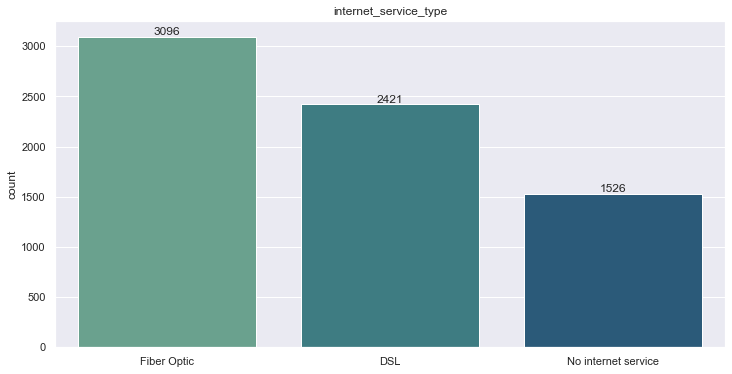

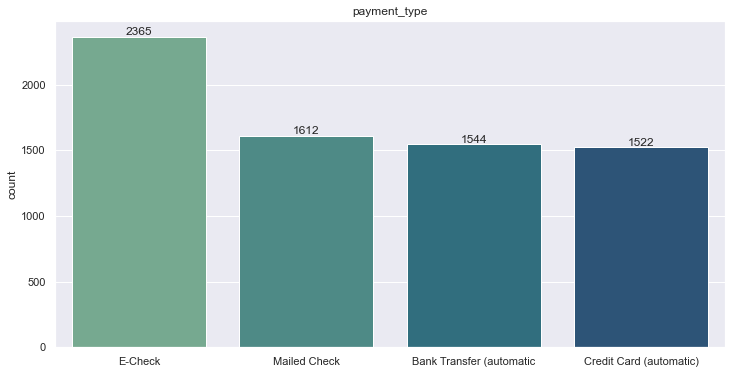

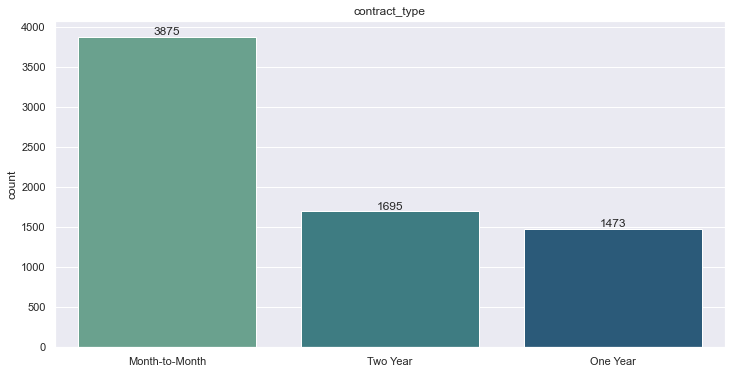

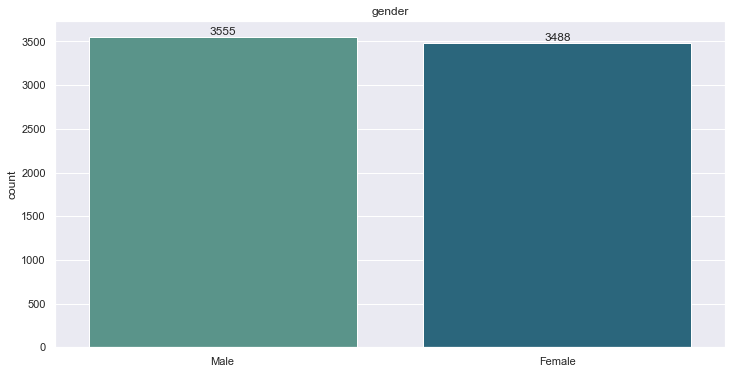

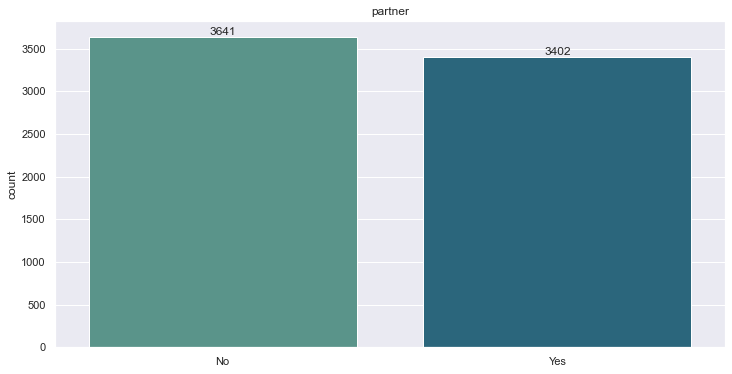

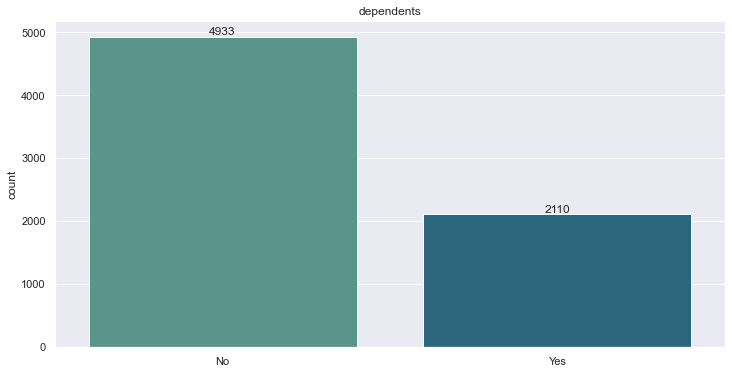

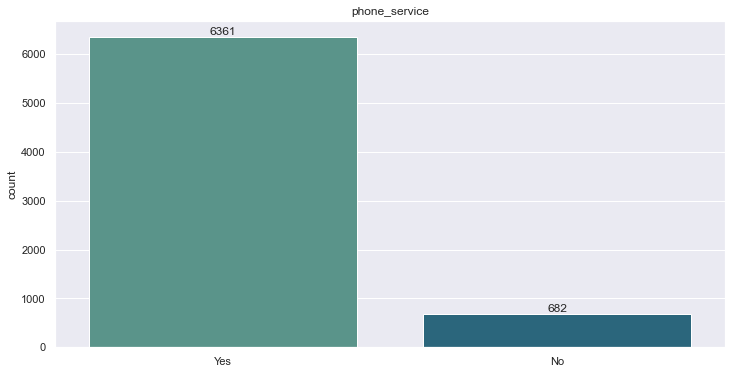

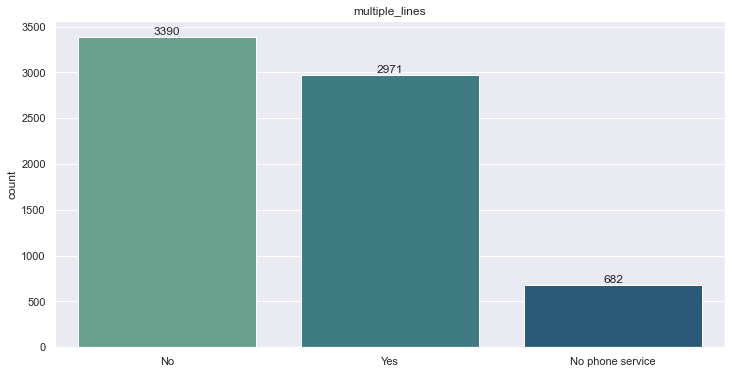

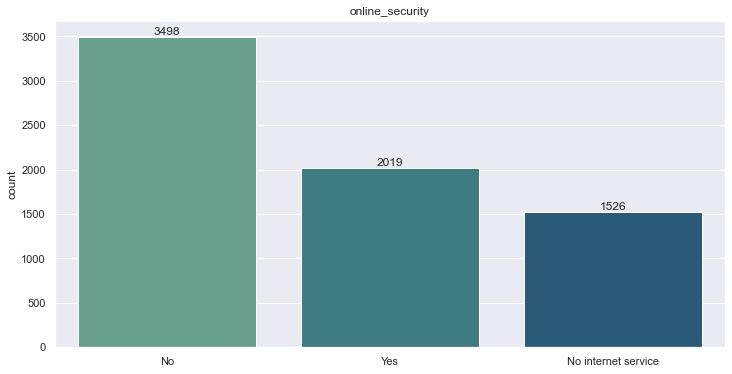

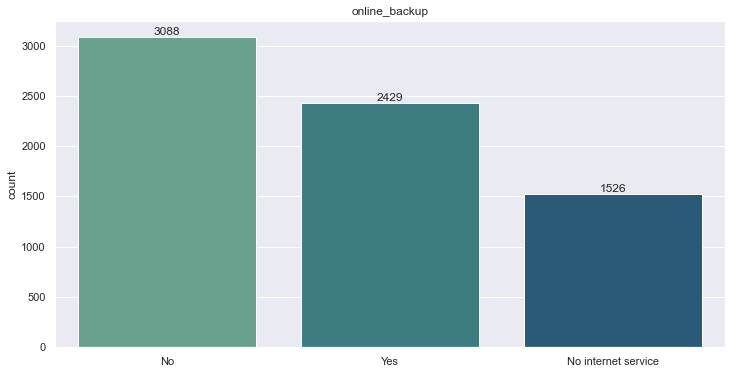

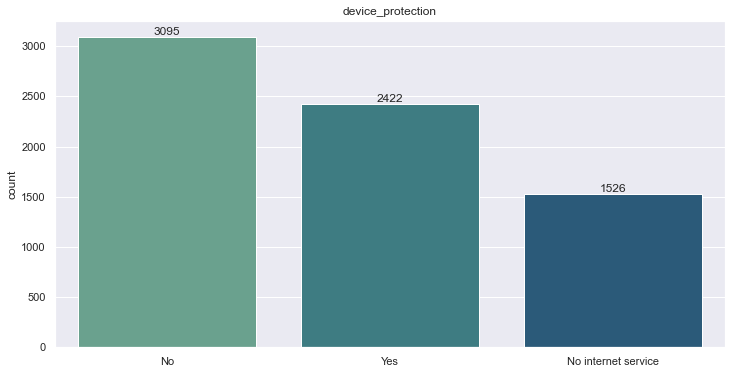

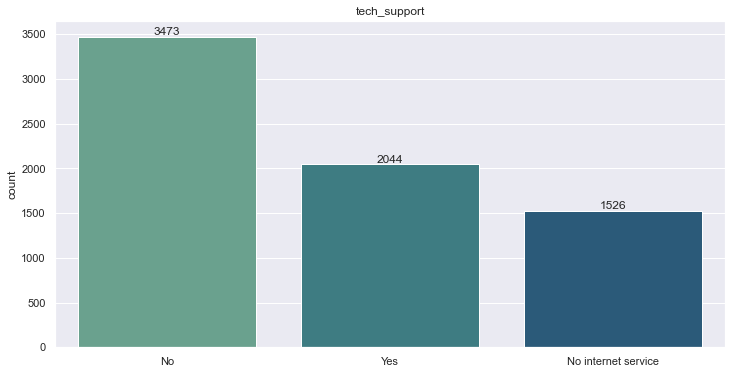

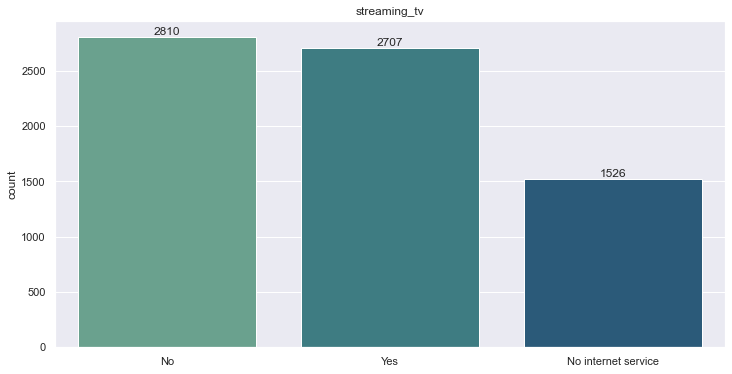

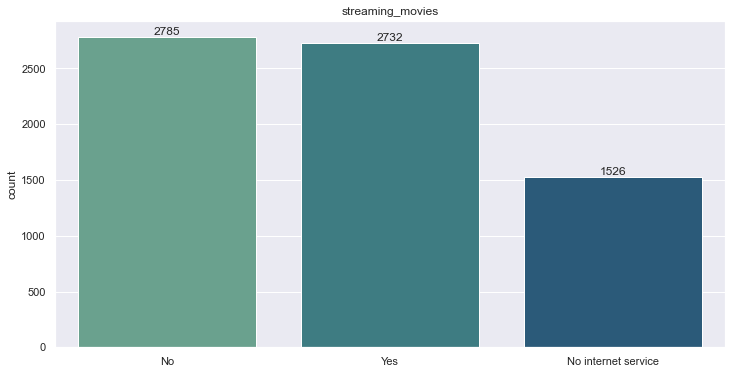

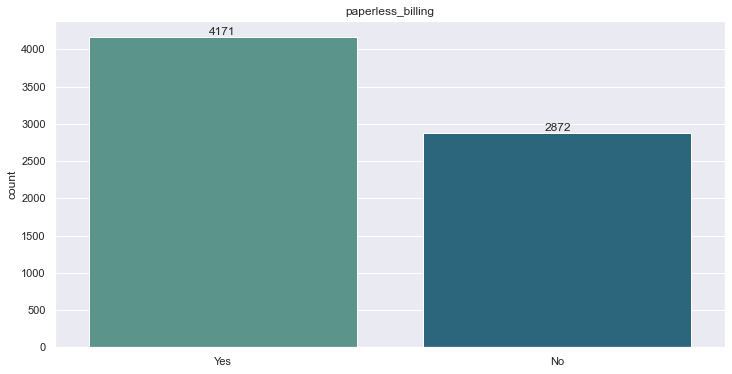

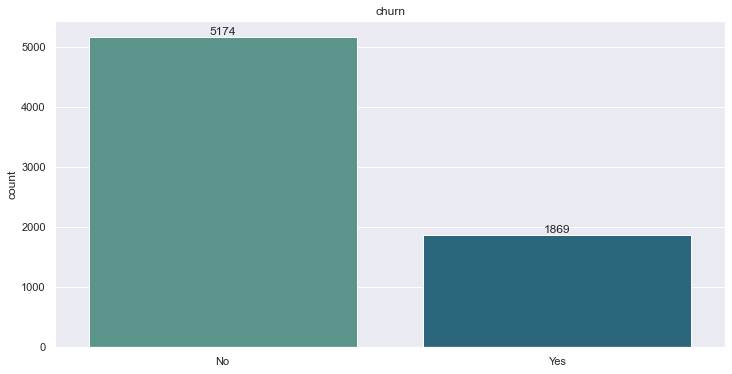

In [345]:
for column in telco_df[cat_lst]:
    if telco_df[column].dtype != "int" or telco_df[column].dtype != "float":
        plt.figure(figsize=(12, 6))
        sns.set(font_scale = 1)
        ax = sns.countplot(x = column, 
                        data = telco_df,
                        palette = "crest",
                        order = telco_df[column].value_counts().index)
        ax.bar_label(ax.containers[0])
        ax.set(xlabel=None)
        plt.title(column)
        plt.show()

In [346]:
telco_df["churn"] = telco_df["churn"].replace({"No": 0, "Yes": 1}).astype("bool")

In [347]:
churn_rate = round(telco_df["churn"].mean(), 3)
churn_rate

0.265

Text(0.5, 0, 'Churned')

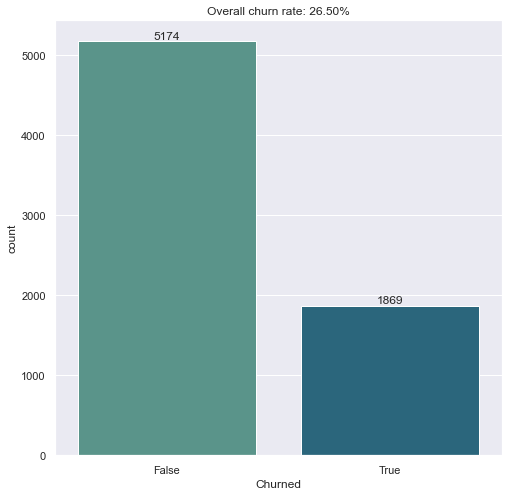

In [416]:
plt.figure(figsize=(8, 8))
sns.set(font_scale = 1)
ax = sns.countplot(x = "churn", 
    data = telco_df,
    order = train["churn"].value_counts().index,
    palette = "crest")

ax.bar_label(ax.containers[0])
plt.xticks(rotation = 0)
plt.title(f"Overall churn rate: {churn_rate:.2%}")
plt.xlabel("Churned")

----
### Univariable Plotting of Conteneous/numerical Columns by Frequency


In [349]:
telco_df.dtypes

internet_service_type                         object
payment_type                                  object
contract_type                                 object
customer_id                                   object
gender                                        object
senior_citizen                                  bool
partner                                       object
dependents                                    object
tenure                                         int64
phone_service                                 object
multiple_lines                                object
online_security                               object
online_backup                                 object
device_protection                             object
tech_support                                  object
streaming_tv                                  object
streaming_movies                              object
paperless_billing                             object
monthly_charges                              f

In [350]:
telco_df.isnull().sum()

internet_service_type                        0
payment_type                                 0
contract_type                                0
customer_id                                  0
gender                                       0
senior_citizen                               0
partner                                      0
dependents                                   0
tenure                                       0
phone_service                                0
multiple_lines                               0
online_security                              0
online_backup                                0
device_protection                            0
tech_support                                 0
streaming_tv                                 0
streaming_movies                             0
paperless_billing                            0
monthly_charges                              0
total_charges                                0
churn                                        0
internet_serv

In [351]:
# 3 total numerical columns 

telco_df.select_dtypes(include = "number").columns

Index(['tenure', 'monthly_charges', 'total_charges'], dtype='object')

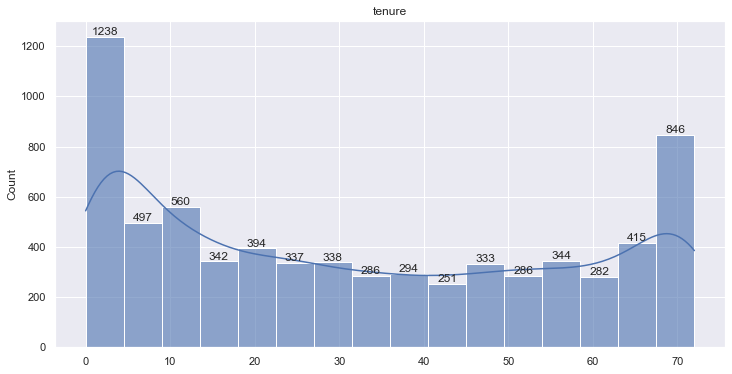

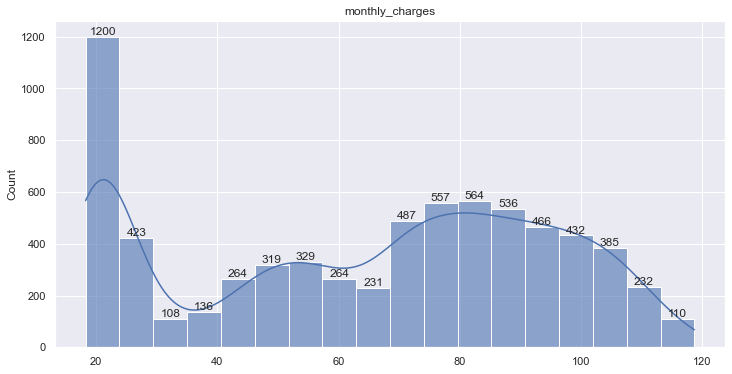

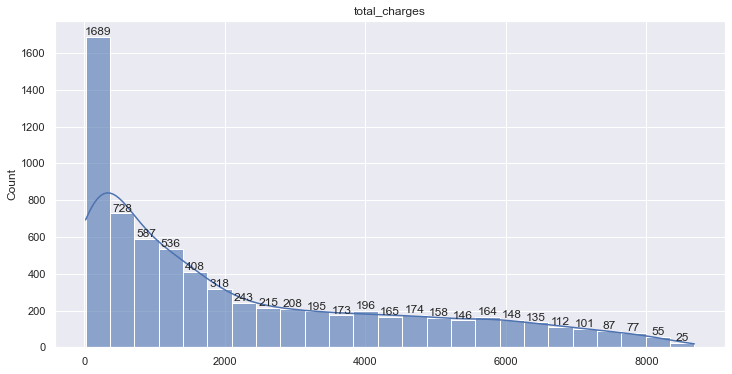

In [352]:
for column in telco_df.columns:
    if telco_df[column].dtype == "int" or telco_df[column].dtype == "float":
        plt.figure(figsize=(12, 6))
        ax = sns.histplot(x = column, 
                        data = telco_df,
                        kde = True,
                        alpha = 0.6)
        ax.set(xlabel = None)
        ax.bar_label(ax.containers[0])
        plt.title(column)
        plt.show()

-----
#### Splitting the Telco Dataset in Train, Validate, and Test

In [353]:

from acquire import train_validate_test_split # defined acquire.py file function to help with cleaning the Telco Dataset

In [354]:
train, validate, test = train_validate_test_split(telco_df)

In [355]:
print(f"Train dataset shape: {train.shape}")
print(f"Validate dataset shape: {validate.shape}")
print(f"Test dataset shape: {test.shape}")

Train dataset shape: (3943, 47)
Validate dataset shape: (1691, 47)
Test dataset shape: (1409, 47)


----
## Exploration Phase

**<u>Key Questions:</u>**

y = decision to churn

X = independent variable

1. Do the current “Internet Options” have an effect on customers’ decision to churn?
    - Comparing Categorical to Categorical (Chi Squared Test) 
<br><br>
2. Did a customer’s “Tech Support” experience have an impact on their decision to churn?
    
    - Comparing Categorical to Categorical (Chi Squared Test)
<br><br>
3. Did a customer’s “Payment Type” have an effect on customers’ decision to churn?
    
    - Comparing Categorical to Categorical (Chi Squared Test)
<br><br>
4. Does a customer’s ability to “Stream Movies” impact their decision to churn?
    
    - Comparing Categorical to Categorical (Chi Squared Test)
<br><br>

**(Bonus)**

5. Does a customer’s ability to “Stream TV” impact their decision to churn?
    
    - Comparing Categorical to Categorical (Chi Squared Test)
<br><br>
6. Does a customer’s “Total Charges” impact their decision to churn?
    
    - Comparing Continuous Value to Categorical (T-test)

In [356]:
# importing necessary modules:

import scipy.stats as stats

**<u>Notes on ChiSquared Testing</u>**

**Assumptions**
* When testing the data, the cells should be frequencies or counts of cases and not percentages. It is okay to convert to percentages after testing the data
* The levels (categories) of the variables being tested are mutually exclusive
* Each participant contributes to only one cell within the Chi-square table
* The groups being tested must be independent
* The value of expected cells should be greater than 5

----

## Question #1: Do the current internet options have an effect on customers' decision to churn?

<u>**Hypothesis Formulation:**</u>

$H_0$: "There is NO association/relationship between a customer's use of current internet options and their decision to churn."

$H_a$: "There IS an association/relationship between a customer's use of current internet options and their decision to churn."

$\alpha$: 0.05

----

In [357]:
alpha = 0.05

In [358]:
# cleaning the data -- setting up my variables:

In [359]:
train["internet_service_type"].unique()

array(['No internet service', 'Fiber Optic', 'DSL'], dtype=object)

In [360]:
# Fiber Optic            1740
# DSL                    1365
# No internet service     838

train["internet_service_type"].value_counts()

Fiber Optic            1740
DSL                    1365
No internet service     838
Name: internet_service_type, dtype: int64

In [361]:
# as a first pass: i will combine DSL and Fiber Optic as my "internet sample"
# future exploration: "determine" if there is any statistical difference/inference between "DSL" and "Fiber Optic" options

internet_df = train[(train["internet_service_type"] == "DSL")| (train["internet_service_type"] == "Fiber Optic")]

In [362]:
internet_df.head()

,internet_service_type,payment_type,contract_type,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,online_backup_yes,device_protection_no_internet_service,device_protection_yes,tech_support_no_internet_service,tech_support_yes,streaming_tv_no_internet_service,streaming_tv_yes,streaming_movies_no_internet_service,streaming_movies_yes,paperless_billing_yes
3796,Fiber Optic,Credit Card (automatic),Month-to-Month,4450-DLLMH,Male,False,No,No,2,Yes,...,False,False,False,False,False,False,False,False,False,True
4566,Fiber Optic,Credit Card (automatic),Month-to-Month,6833-JMZYP,Female,False,No,No,15,Yes,...,False,False,True,False,False,False,True,False,True,True
2389,DSL,Mailed Check,One Year,9830-ECLEN,Male,False,Yes,Yes,58,No,...,True,False,True,False,False,False,True,False,False,False
2793,Fiber Optic,E-Check,Month-to-Month,1200-TUZHR,Female,True,No,No,8,Yes,...,False,False,False,False,False,False,False,False,True,False
3317,Fiber Optic,Bank Transfer (automatic,Two Year,2904-GGUAZ,Female,False,Yes,No,72,Yes,...,True,False,False,False,False,False,False,False,False,True


In [363]:
internet_df.shape # checking the returned number of values/observations 

(3105, 47)

In [364]:
# creating my "observed" values

observed = pd.crosstab(index = internet_df["internet_service_type"], columns = internet_df["churn"], margins = True)
observed

churn,False,True,All
internet_service_type,,,
DSL,1106,259,1365
Fiber Optic,1016,724,1740
All,2122,983,3105


In [365]:
# running the ChiSquared Test

chi, p_value, degf, exp_values = stats.chi2_contingency(observed)

In [366]:
print("chi =", chi)
print("p_value =", p_value)
print("degrees of freedom =", degf, "\n")

print("-----","\n","expected values:", "\n", exp_values)

chi = 181.1337287979812
p_value = 4.2564632763856625e-38
degrees of freedom = 4 

----- 
 expected values: 
 [[ 932.85990338  432.14009662 1365.        ]
 [1189.14009662  550.85990338 1740.        ]
 [2122.          983.         3105.        ]]


In [367]:
if p_value < alpha:
    print("REJECT Null Hypothesis.")
else:
    print("Fail to reject Null Hypothesis.")

REJECT Null Hypothesis.


**Conclusion:**

1. Given the relatively low p-value in our ChiSquared Test - we can conclude with a 95% confidence interval in this dataset that there is an association/relationship between a customer's use of current internet options (DSL or Fiber Optic) and their decision to churn.
   
   *Internet Options:*

       - DSL
       - Fiber Optic
<br><br>
2. We will therefore carry these features forward into future predictive modeling.

----

## Question #2: Does a customer’s “Tech Support” service option have an impact on their decision to churn?


<u>**Hypothesis Formulation (tech support option):**</u>

$H_0$: "There is NO association/relationship between the tech support option and a customer's decision to churn."

$H_a$: "There IS an association/relationship between the tech support option and a customer's decision to churn."


$\alpha$: 0.05

----

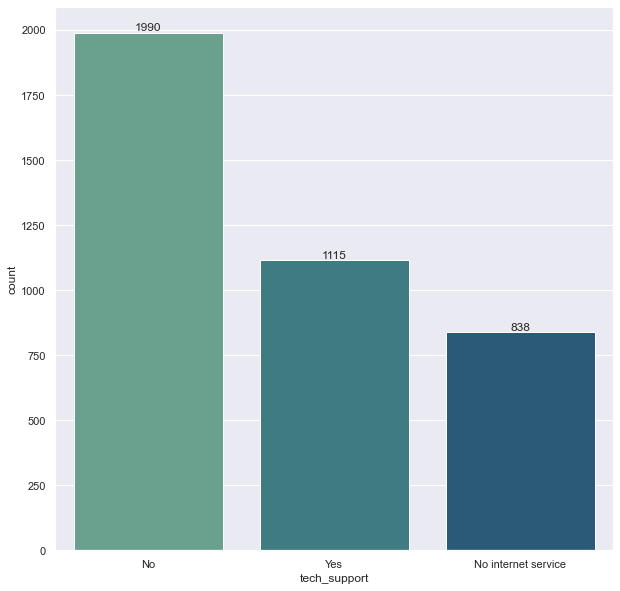

In [413]:
plt.figure(figsize=(10, 10))
ax = sns.countplot(x = "tech_support", 
    data = train,
    order = train["tech_support"].value_counts().index,
    palette = "crest")

ax.bar_label(ax.containers[0])
plt.show()

In [386]:
alpha = 0.05

In [387]:
train["tech_support"].unique()

array(['No internet service', 'No', 'Yes'], dtype=object)

In [389]:
tech_support = train[(train["tech_support"] == "Yes") | (train["tech_support"] == "No")]
tech_support.head()

,internet_service_type,payment_type,contract_type,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,online_backup_yes,device_protection_no_internet_service,device_protection_yes,tech_support_no_internet_service,tech_support_yes,streaming_tv_no_internet_service,streaming_tv_yes,streaming_movies_no_internet_service,streaming_movies_yes,paperless_billing_yes
3796,Fiber Optic,Credit Card (automatic),Month-to-Month,4450-DLLMH,Male,False,No,No,2,Yes,...,False,False,False,False,False,False,False,False,False,True
4566,Fiber Optic,Credit Card (automatic),Month-to-Month,6833-JMZYP,Female,False,No,No,15,Yes,...,False,False,True,False,False,False,True,False,True,True
2389,DSL,Mailed Check,One Year,9830-ECLEN,Male,False,Yes,Yes,58,No,...,True,False,True,False,False,False,True,False,False,False
2793,Fiber Optic,E-Check,Month-to-Month,1200-TUZHR,Female,True,No,No,8,Yes,...,False,False,False,False,False,False,False,False,True,False
3317,Fiber Optic,Bank Transfer (automatic,Two Year,2904-GGUAZ,Female,False,Yes,No,72,Yes,...,True,False,False,False,False,False,False,False,False,True


In [390]:
tech_support.shape

(3105, 47)

In [391]:
# tech_support dataframe summary statistics

summary_stats = tech_support.describe().T
summary_stats

,count,mean,std,min,25%,50%,75%,max
tenure,3105.0,33.323349,24.589355,0.0,9.00,30.00,56.00,72.0
monthly_charges,3105.0,77.014702,21.853526,23.9,60.05,79.50,94.40,118.6
total_charges,3105.0,2765.348148,2363.798364,24.4,611.65,2201.75,4599.15,8684.8


In [392]:
# summary statistics with "range" column

summary_stats["range"] = summary_stats["max"] - summary_stats["min"]
summary_stats

,count,mean,std,min,25%,50%,75%,max,range
tenure,3105.0,33.323349,24.589355,0.0,9.00,30.00,56.00,72.0,72.0
monthly_charges,3105.0,77.014702,21.853526,23.9,60.05,79.50,94.40,118.6,94.7
total_charges,3105.0,2765.348148,2363.798364,24.4,611.65,2201.75,4599.15,8684.8,8660.4


In [393]:
# creating an observation table of the dataframe

observed = pd.crosstab(index = tech_support["tech_support"], columns = tech_support["churn"], margins = True)
observed

churn,False,True,All
tech_support,,,
No,1173,817,1990
Yes,949,166,1115
All,2122,983,3105


In [394]:
# running the ChiSquared Test

chi, p_value, degf, exp_values = stats.chi2_contingency(observed)

In [395]:
print("chi =", chi)
print("p_value =", p_value)
print("degrees of freedom =", degf, "\n")

print("-----","\n","expected values:", "\n", exp_values)

chi = 226.15764143755223
p_value = 8.865376103001764e-48
degrees of freedom = 4 

----- 
 expected values: 
 [[1359.99355878  630.00644122 1990.        ]
 [ 762.00644122  352.99355878 1115.        ]
 [2122.          983.         3105.        ]]


In [396]:
if p_value < alpha:
    print("REJECT Null Hypothesis.")
else:
    print("Fail to reject Null Hypothesis.")

REJECT Null Hypothesis.


**Conclusion:**

1. Given the relatively low p-value in our ChiSquared Test - we can conclude with a 95% confidence interval in this dataset that there is an association/relationship between the "tech support" service option and a customer's decision to churn.
   
   *Tech Support Options (w/internet services):*
   
        - Yes (has tech support)
        - No (doesn't have tech support)

2. We will therefore carry this feature forward into future predictive modeling.

----

## Question #3: Does a customer’s “Payment Type” have an effect on their decision to churn?

<u>**Hypothesis Formulation (payment types):**</u>

$H_0$: "There is NO association/relationship between customers' monthly bill payment options and their decision to churn."

$H_a$: "There IS an association/relationship between customers' monthly bill payment options and their decision to churn."


$\alpha$: 0.05

----

In [397]:
alpha = 0.05

In [399]:
train["payment_type"].unique()

array(['Mailed Check', 'Credit Card (automatic)', 'E-Check',
       'Bank Transfer (automatic'], dtype=object)

In [401]:
# since I am measuring all payment options impact on churn, i will not need to create a new dataframe
# generating summary statistics 

summary_stats = train.describe().T
summary_stats

,count,mean,std,min,25%,50%,75%,max
tenure,3943.0,32.531829,24.542655,0.0,9.000,29.00,56.000,72.0
monthly_charges,3943.0,65.119883,30.023920,18.4,38.175,70.60,90.050,118.6
total_charges,3943.0,2313.859067,2284.689172,18.8,402.725,1415.55,3840.675,8684.8


In [402]:
# creating a "range" column for this dataset

summary_stats["range"] = summary_stats["max"] - summary_stats["min"]
summary_stats

,count,mean,std,min,25%,50%,75%,max,range
tenure,3943.0,32.531829,24.542655,0.0,9.000,29.00,56.000,72.0,72.0
monthly_charges,3943.0,65.119883,30.023920,18.4,38.175,70.60,90.050,118.6,100.2
total_charges,3943.0,2313.859067,2284.689172,18.8,402.725,1415.55,3840.675,8684.8,8666.0


[Text(0, 0, '1350'), Text(0, 0, '890'), Text(0, 0, '868'), Text(0, 0, '835')]

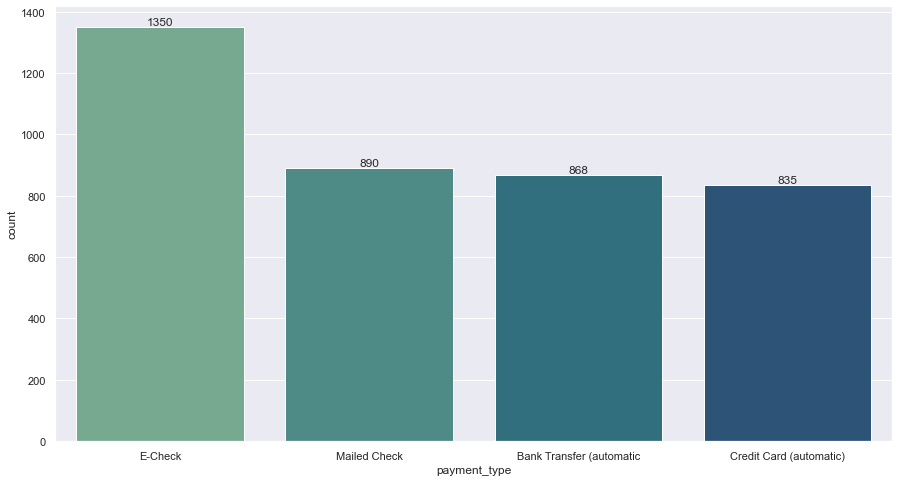

In [411]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(x = "payment_type", 
    data = train,
    order = train["payment_type"].value_counts().index,
    palette = "crest")

ax.bar_label(ax.containers[0])